In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,f_classif,SelectFromModel
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier


C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
pd.set_option('display.max_columns',500)

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [6]:
train.loc[train['var3']==-999999,'var3']=2
train.var3.value_counts()

2      74281
8        138
9        110
3        108
1        105
       ...  
177        1
87         1
151        1
215        1
191        1
Name: var3, Length: 207, dtype: int64

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00, 8.0000e+00,
        1.2000e+01, 2.5000e+01, 3.3000e+01, 4.5000e+01, 5.2000e+01,
        8.5000e+01, 1.0300e+02, 1.6700e+02, 1.8400e+02, 2.6000e+02,
        3.9000e+02, 4.7600e+02, 6.9700e+02, 9.7900e+02, 1.1730e+03,
        1.6050e+03, 1.9210e+03, 2.3050e+03, 2.6800e+03, 3.1060e+03,
        3.2910e+03, 3.6510e+03, 3.5790e+03, 3.5620e+03, 3.5760e+03,
        3.3860e+03, 3.2440e+03, 1.7815e+04, 2.7490e+03, 2.3130e+03,
        2.1110e+03, 1.7320e+03, 1.5860e+03, 1.2680e+03, 1.0670e+03,
        9.2500e+02, 7.3800e+02, 5.3500e+02, 4.9600e+02, 3.6200e+02,
        3.2100e+02, 2.7700e+02, 2.2900e+02, 1.8000e+02, 1.5000e+02,
        1.1100e+02, 6.8000e+01, 6.3000e+01, 5.9000e+01, 3.6000e+01,
        3.2000e+01, 3.5000e+01, 3.3000e+01, 2.8000e+01, 1.3000e+01,
        6.0000e+00, 1.1000e+01, 3.0000e+00, 8.0000e+00, 3.0000e+00,
        6.0000e+00, 1.0000e+00, 3.0000e+00, 5.00

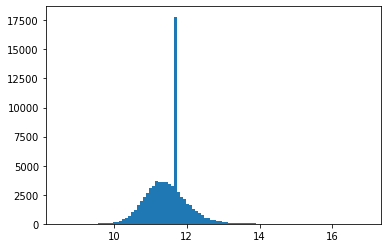

In [7]:
plt.hist(np.log(train['var38']),bins=100)

In [8]:
mat=train.corr()

In [9]:
x=pd.DataFrame({'columns': train.columns,'corr':mat['TARGET'].values})

In [10]:
x=x.set_index('columns',drop=True).sort_values(by='corr',ascending=False)


In [11]:
x[:40]

,corr
columns,
TARGET,1.000000
var36,0.102919
var15,0.101322
ind_var8_0,0.046665
num_var8_0,0.046622
imp_op_var39_efect_ult1,0.030380
imp_op_var41_efect_ult1,0.029479
num_var8,0.027926
ind_var8,0.027926


C:\Users\Saurav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


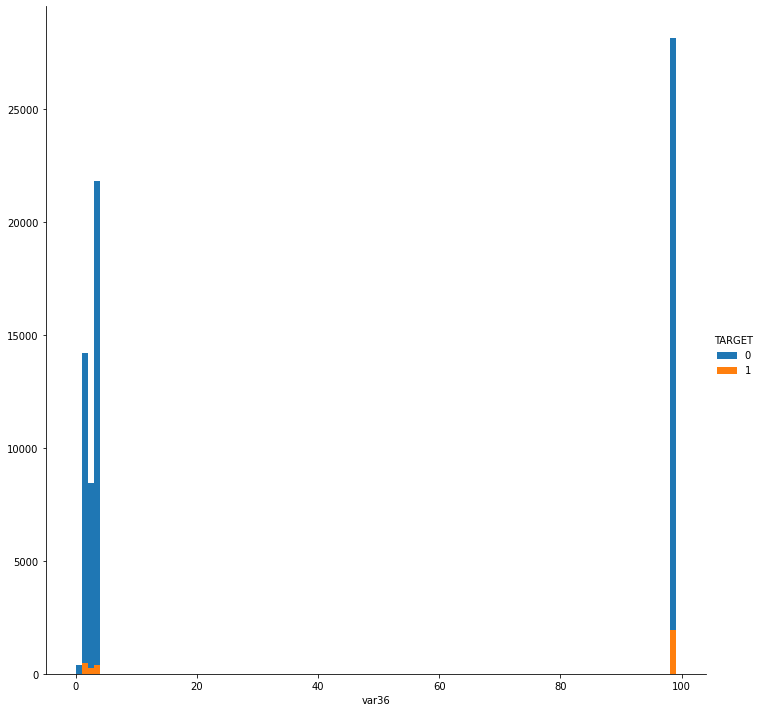

In [12]:
sns.FacetGrid(train,hue='TARGET',size=10).map(plt.hist,'var36',bins=100).add_legend()

In [13]:
train['var38'].value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
318211.440000        1
73069.260000         1
36425.370000         1
163515.900000        1
159395.520000        1
Name: var38, Length: 57736, dtype: int64

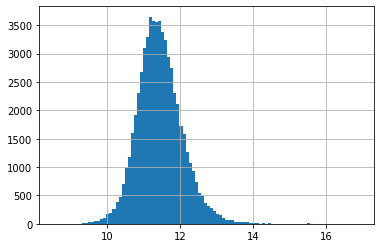

In [14]:
train.loc[~np.isclose(train.var38,117310.979016),'var38'].map(np.log).hist(bins=100)

In [15]:
train['log_var38']=train.loc[~np.isclose(train.var38,117310.979016),'var38'].map(np.log)
train.loc[np.isclose(train.var38,117310.979016),'log_var38']=0

In [16]:
train['var38_hasmostcommon']=np.isclose(train.var38, 117310.979016)

In [17]:
y=train['TARGET']
train=train.drop('TARGET',axis=1)

In [18]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

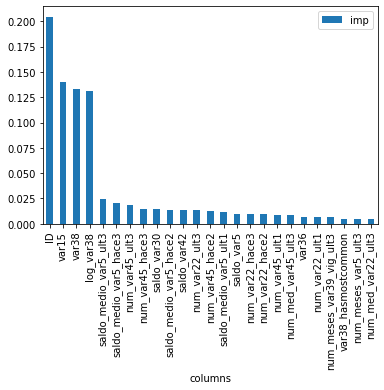

In [19]:
feat=pd.DataFrame({'columns':train.columns,'imp':rf.feature_importances_})
feat=feat.set_index('columns',drop=True).sort_values('imp',ascending=False)
x=feat[:25]
x.plot(kind='bar')

In [20]:
from sklearn.feature_selection import VarianceThreshold


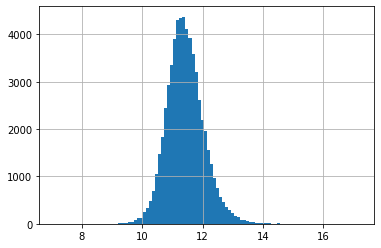

In [21]:
test.loc[~np.isclose(test.var38,117310.979016),'var38'].map(np.log).hist(bins=100)

In [22]:
test['log_var38']=test.loc[~np.isclose(test.var38,117310.979016),'var38'].map(np.log)
test.loc[np.isclose(test.var38,117310.979016),'log_var38']=0
test['var38_hasmostcommon']=np.isclose(test.var38, 117310.979016)

In [23]:
n_train=len(train)
n_test=len(test)

In [24]:
all_df=pd.concat((train,test)).reset_index()


In [25]:
all_df.drop('index',axis=1,inplace=True)

In [26]:
all_df.loc[all_df['var3']==-999999,'var3']=2

In [27]:
sel=VarianceThreshold(threshold=0)
sel.fit(all_df)

VarianceThreshold(threshold=0)

In [28]:
cols=[x for x in all_df.columns if x not in all_df.columns[sel.get_support()]]

In [29]:
all_df.drop(cols,axis=1,inplace=True)

In [31]:
all_df['var36'].value_counts()

99    60159
3     44393
1     29032
2     17472
0       782
Name: var36, dtype: int64

In [58]:
from sklearn.feature_selection import SelectPercentile
p=3
f_cl=SelectPercentile(f_classif,percentile=p).fit(train,y)

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  UserWarning)
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [59]:
sel=f_cl.get_support()
cols=[f for i,f in enumerate(train.columns) if sel[i]]
cols

['var15',
 'ind_var5',
 'ind_var8_0',
 'ind_var30',
 'num_var4',
 'num_var5',
 'num_var8_0',
 'num_var30',
 'num_var35',
 'num_var42',
 'var36',
 'num_meses_var5_ult3']

In [67]:
all_df[['ind_var5','ind_var5_0','ind_var8','ind_var8_0']]

,ind_var5,ind_var5_0,ind_var8,ind_var8_0
0,0,1,0,0
1,0,1,0,0
2,1,1,0,0
3,1,1,0,0
4,0,1,0,0
...,...,...,...,...
151833,0,1,0,0
151834,1,1,0,0
151835,1,1,0,0
151836,1,1,0,0


In [94]:
train1=all_df.iloc[:n_train,:]
test1=all_df.iloc[n_train:,:]
id=test['ID']
train=train.drop('ID',axis=1)
test=test.drop('ID',axis=1)


In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train1,y,test_size=0.2,stratify=y,random_state=8)
clsf=XGBClassifier(n_estimators=350,max_depth=5,learning_rate=0.03,nthread=4, subsample=0.6815, colsample_bytree=0.7, seed=4242)


In [132]:
clsf.fit(x_train,y_train,early_stopping_rounds=50,eval_metric='auc',eval_set=[(x_test,y_test)],verbose=10)

[0]	validation_0-auc:0.797349
Will train until validation_0-auc hasn't improved in 50 rounds.
[10]	validation_0-auc:0.82047
[20]	validation_0-auc:0.824233
[30]	validation_0-auc:0.825847
[40]	validation_0-auc:0.827108
[50]	validation_0-auc:0.827218
[60]	validation_0-auc:0.829347
[70]	validation_0-auc:0.830605
[80]	validation_0-auc:0.831636
[90]	validation_0-auc:0.832002
[100]	validation_0-auc:0.833026
[110]	validation_0-auc:0.833568
[120]	validation_0-auc:0.834506
[130]	validation_0-auc:0.834824
[140]	validation_0-auc:0.835174
[150]	validation_0-auc:0.835626
[160]	validation_0-auc:0.836243
[170]	validation_0-auc:0.836545
[180]	validation_0-auc:0.836963
[190]	validation_0-auc:0.837185
[200]	validation_0-auc:0.837783
[210]	validation_0-auc:0.83779
[220]	validation_0-auc:0.83831
[230]	validation_0-auc:0.838672
[240]	validation_0-auc:0.83857
[250]	validation_0-auc:0.838761
[260]	validation_0-auc:0.838805
[270]	validation_0-auc:0.838964
[280]	validation_0-auc:0.838856
[290]	validation_0-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=350, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4242,
              silent=None, subsample=0.6815, verbosity=1)

In [134]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,clsf.predict_proba(x_train)[:,1]))

0.8906269999543173


In [135]:
y_pred=clsf.predict_proba(test1)[:,1]

In [136]:
submission = pd.DataFrame({"ID":id, "TARGET":y_pred})
submission.to_csv("submission1.csv", index=False)